In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dhdrnet.util import DATA_DIR, ROOT_DIR

plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 18})

figdir = ROOT_DIR / "precomputed_data" / "figures"

In [31]:
df = (
    pd.read_csv(ROOT_DIR / "precomputed_data" / "store_2020-10-27.csv", index_col=0)
    .drop(columns="ev1")
    .rename(columns={"ev2": "ev"})
)
names = pd.read_csv(ROOT_DIR / "precomputed_data" / "test_current.csv")
df = df[df["name"].isin(names["names"])]
df = df.drop_duplicates()
df

,ev,name,metric,score
0,-3.00,33TJ_20150705_191438_366,rmse,51.958540
1,-3.00,33TJ_20150705_191438_366,psnr,13.817665
2,-3.00,33TJ_20150705_191438_366,ssim,0.770589
3,-3.00,33TJ_20150705_191438_366,perceptual,0.137271
4,-2.75,33TJ_20150705_191438_366,rmse,52.714380
...,...,...,...,...
524011,5.75,33TJ_20150730_201700_327,perceptual,0.168824
524012,6.00,33TJ_20150730_201700_327,rmse,46.813727
524013,6.00,33TJ_20150730_201700_327,psnr,14.723339
524014,6.00,33TJ_20150730_201700_327,ssim,0.804065


In [32]:
grouped = df.set_index("name").groupby(["metric"])
grouped.describe()["score"][["mean", "std"]]

,mean,std
metric,,
perceptual,0.159449,0.119443
psnr,17.763379,5.882419
rmse,40.331823,23.810546
ssim,0.753259,0.240278


In [33]:
idxmins = (
    df[(df["metric"] == "perceptual") | (df["metric"] == "rmse")]
    .groupby(["name", "metric"])["score"]
    .idxmin()
)
best_scores_min = df.loc[idxmins]
best_scores_min
# this is the minimum score for each metric for each image
# unfortunately we want min for mse and perceptual
# and maxes for psnr, ssim

,ev,name,metric,score
71503,2.00,0006_20160721_163256_525,perceptual,0.048938
71468,-0.25,0006_20160721_163256_525,rmse,13.375292
267775,2.00,0006_20160721_172953_515,perceptual,0.046327
267812,4.50,0006_20160721_172953_515,rmse,16.800184
453539,2.25,0006_20160721_175246_335,perceptual,0.052811
...,...,...,...,...
125384,3.75,c483_20150901_211258_521,rmse,8.596414
108975,4.00,c483_20150901_211301_691,perceptual,0.034727
108968,3.75,c483_20150901_211301_691,rmse,8.349358
215103,4.00,c483_20150901_211303_855,perceptual,0.038107


In [34]:
idxmaxs = (
    df[(df["metric"] == "psnr") | (df["metric"] == "ssim")]
    .groupby(["name", "metric"])["score"]
    .idxmax()
)
best_scores_max = df.loc[idxmaxs]
best_scores_max

,ev,name,metric,score
71469,-0.25,0006_20160721_163256_525,psnr,25.604738
71502,2.00,0006_20160721_163256_525,ssim,0.967882
267813,4.50,0006_20160721_172953_515,psnr,23.624523
267778,2.25,0006_20160721_172953_515,ssim,0.971418
453565,4.00,0006_20160721_175246_335,psnr,26.166534
...,...,...,...,...
125374,3.00,c483_20150901_211258_521,ssim,0.973904
108969,3.75,c483_20150901_211301_691,psnr,29.697741
108958,3.00,c483_20150901_211301_691,ssim,0.974946
215097,3.75,c483_20150901_211303_855,psnr,29.431777


In [35]:
best_scores_df = pd.concat([best_scores_min, best_scores_max])
oracle = best_scores_df.groupby(["metric"]).describe()["score"][["mean", "std"]]
oracle

,mean,std
metric,,
perceptual,0.036645,0.023394
psnr,29.266007,5.601647
rmse,10.397501,5.555066
ssim,0.973945,0.014912


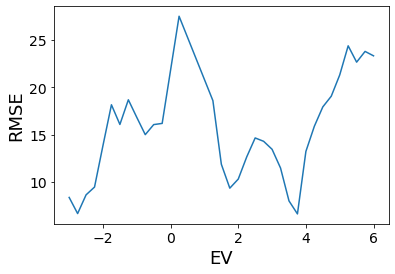

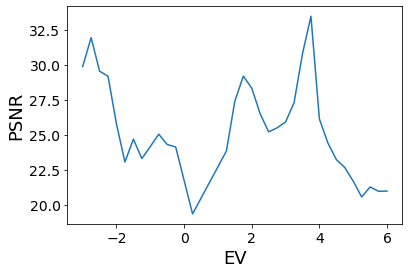

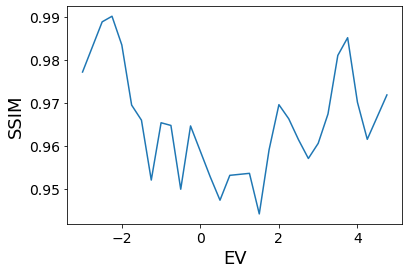

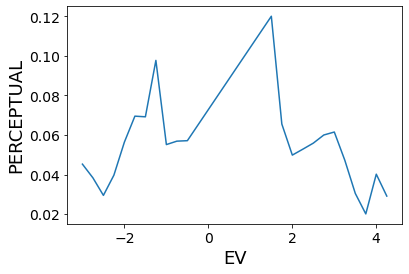

In [36]:
oracle_by_ev = best_scores_df.groupby(["metric", "ev"]).describe()["score"]

for metric in ["rmse", "psnr", "ssim", "perceptual"]:
    plt.plot(
        oracle_by_ev["mean"][metric].index,
        oracle_by_ev["mean"][metric],
    )
    plt.xlabel("EV")
    plt.ylabel(metric.upper())
    plt.savefig(figdir / f"{metric.upper()}_best_scores.pdf", pad_inches=0)
    plt.show()

In [37]:
df.loc[df["ev"] == 3.5].groupby("metric").describe()["score"][["mean", "std"]]

,mean,std
metric,,
perceptual,0.052145,0.036988
psnr,27.103385,5.485871
rmse,13.692127,9.275137
ssim,0.962770,0.022501


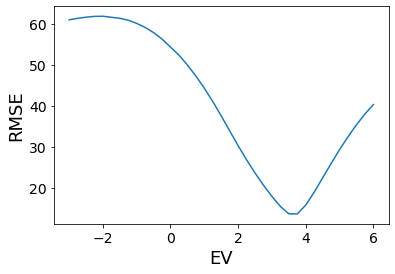

<Figure size 432x288 with 0 Axes>

In [38]:
df_by_metric = df.groupby(["metric", "ev"]).describe()["score"]
plt.plot(
    df_by_metric["mean"]["rmse"].index,
    df_by_metric["mean"]["rmse"],
    #     s=0.2 * df_by_metric["std"]["rmse"] ** 2,
)
plt.xlabel("EV")
plt.ylabel("RMSE")
plt.show()
plt.savefig(figdir / "RMSE_by_ev.pdf")

In [39]:
df.loc[df["ev"] == 3.5].groupby("metric").describe()["score"][["mean", "std"]].to_latex(
    figdir / "fixed_choice.tex"
)

In [40]:
cdf = pd.read_csv(
    ROOT_DIR / "precomputed_data" / "store_updown_2020-10-26.csv"
).drop_duplicates()
cdf.loc[cdf["metric"] == "rmse", "score"] = cdf.loc[
    cdf["metric"] == "rmse", "score"
].apply(np.sqrt)

cdf

,name,metric,ev,score
0,0030_20151008_105249_589,rmse,1,39.161667
1,0030_20151008_105249_589,psnr,1,16.273580
2,0030_20151008_105249_589,ssim,1,0.812035
3,0030_20151008_105249_589,rmse,2,25.583744
4,0030_20151008_105249_589,psnr,2,19.971522
...,...,...,...,...
10855,0043_20160923_122514_781,psnr,4,19.521871
10856,0043_20160923_122514_781,ssim,4,0.928805
10857,0043_20160923_122514_781,rmse,5,30.929737
10858,0043_20160923_122514_781,psnr,5,18.323279


In [41]:
cdf.groupby(["ev", "metric"]).describe()["score"][["mean", "std"]].to_latex(
    figdir / "conv_choice.tex"
)
cdf.groupby(["ev", "metric"]).describe()["score"][["mean", "std"]]

mean        std
ev metric                      
1  psnr    16.144820   4.237501
   rmse    44.319712  19.385214
   ssim     0.707827   0.226675
2  psnr    20.877057   5.383900
   rmse    27.334192  14.555937
   ssim     0.848401   0.141950
3  psnr    25.248919   3.031392
   rmse    14.784704   5.051738
   ssim     0.943758   0.033221
4  psnr    26.384000   3.998241
   rmse    13.644772   7.042175
   ssim     0.967228   0.020001
5  psnr    19.700461   3.322998
   rmse    28.345435  10.790692
   ssim     0.880723   0.058906

In [42]:
def parse_preds(pred_str):
    splits = pred_str.split(" ")
    return [float(s) for s in splits[1:-1] if len(s) > 0]


model_name = "mobile"
model_df = pd.read_csv(
    ROOT_DIR / "precomputed_data" / f"{model_name}_preds.csv", index_col=0
)
model_df["pred"] = model_df["pred"].apply(parse_preds)
model_df

,name,pred
0,0006_20160721_170707_736,"[3.5, 3.0, 3.25, 4.0, 2.75, 2.5, 2.0, 2.25]"
1,0006_20160721_175239_909,"[3.5, 4.0, 3.25, 3.0, 4.25, 2.75, 2.5, 2.0, 4.5]"
2,0006_20160721_181525_062,"[4.0, 3.75, 4.25, 3.5, 4.5, 3.25, 4.75, 3.0, -..."
3,0006_20160722_100126_028,"[3.5, 3.75, 3.25, 2.75, 2.5, 4.0, 2.0, 2.25]"
4,0006_20160722_100951_201,"[-0.5, -0.75, -1.0, 3.0, 3.5, 4.25, 3.25, 5.0]"
...,...,...
719,c483_20150901_173210_443,"[-1.0, 4.25, -0.75, -0.25, 4.0, 4.5, 3.75, 3.5..."
720,c483_20150901_194029_165,"[4.0, 4.25, 3.75, 4.5, 3.5, 3.25, 4.75, -1.0, ..."
721,c483_20150901_195108_436,"[4.0, 4.25, 4.5, 5.0, 3.0, 3.25, 3.75, 3.5]"
722,c483_20150901_214630_530,"[3.25, 2.75, 2.5, 3.5, 3.75, 2.0, 2.25, 1.75, ..."


In [43]:
from dhdrnet.util import get_pred, get_scores_for_preds, get_topk_score_df

In [44]:
# joined = df.set_index("name").join(model_df.set_index("name"))
# joined.iloc[0]
df.iloc[0]

ev                              -3
name      33TJ_20150705_191438_366
metric                        rmse
score                      51.9585
Name: 0, dtype: object

In [45]:
model_df.iloc[0]

name                       0006_20160721_170707_736
pred    [3.5, 3.0, 3.25, 4.0, 2.75, 2.5, 2.0, 2.25]
Name: 0, dtype: object

In [56]:
t = get_scores_for_preds(model_df, df)
t.groupby("metric").describe()["score"]  # These are the top-10 accuracies

IndexError: list index out of range

In [47]:
r = get_topk_score_df(t, k=1)
r

,ev,name,metric,score


In [48]:
model_by_ev = r.groupby(["metric", "ev"]).describe()["score"]
for metric in ["rmse", "psnr", "ssim", "perceptual"]:
    plt.plot(
        model_by_ev["mean"][metric].index,
        model_by_ev["mean"][metric],
        #         model_by_ev["std"][metric]**2,
    )
    plt.xlabel("EV")
    plt.ylabel(metric.upper())
    # plt.savefig(figdir / f"{model_name}_{metric}_by_ev.pdf")
    plt.show()

IndexError: list index out of range

In [49]:
t2 = get_pred(model_df, df)
t2.nunique()

ev        0
name      0
metric    0
score     0
dtype: int64

In [50]:
t2.groupby("metric").describe()["score"][["mean", "std"]]

IndexError: list index out of range

In [51]:
t2.groupby("metric").describe()["score"][["mean", "std"]]

IndexError: list index out of range

In [52]:
r.groupby("metric").describe()["score"][["mean", "std"]]

IndexError: list index out of range

In [53]:
from dhdrnet.gen_pairs import GenAllPairs

gen = GenAllPairs(raw_path=DATA_DIR / "dngs", out_path=DATA_DIR)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/shane/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


Loading model from: /home/shane/.cache/pypoetry/virtualenvs/dhdrnet-CxDQYEDG-py3.8/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth


/home/shane/.cache/pypoetry/virtualenvs/dhdrnet-CxDQYEDG-py3.8/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [55]:
sample = r[r["metric"] == "rmse"].sample(n=100)
sample

ValueError: a must be greater than 0 unless no samples are taken

In [28]:
for _i, (ev, name, _, score) in r[(r["metric"] == "rmse") & (r["name"])].iterrows(): #.sample(n=4).iterrows():
    baseline_img, pred_img = gen.get_exposures(name, [0.0, ev])
    gt_img = gen.get_ground_truth(name)
    fused_img = gen.get_fused(name, [0.0, ev])
    plt.tight_layout()
    fig, axs = plt.subplots(1, 4, figsize=(18, 6))
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
    axs[0].imshow(baseline_img[..., [2, 1, 0]])
    axs[0].set_xlabel("EV 0 Image")

    axs[1].imshow(pred_img[..., [2, 1, 0]])
    axs[1].set_xlabel(f"Predicted EV: {ev}")

    axs[2].imshow(fused_img[..., [2, 1, 0]])
    axs[2].set_xlabel("Fused Image")

    axs[3].imshow(gt_img[..., [2, 1, 0]])
    axs[3].set_xlabel("Ground Truth Image")

    # plt.savefig(
    #     figdir / "predictions" / f"{name}_predictions.png",
    #     bbox_inches="tight",
    #     transparent="True",
    #     pad_inches=0,
    # )
    plt.show()

    plt.close('all')